<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_57_lasso_regression_demo/Lecture_57_lasso_regression_key_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries for data loading, manipulation, and plotting.

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
# Load the diabetes dataset, a commonly used dataset for regression tasks.

data = load_diabetes()

In [5]:
# Create a Pandas DataFrame from the dataset features and assign column names.

df = pd.DataFrame(data.data, columns=data.feature_names)


In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
# Add the target variable (diabetes progression) to the DataFrame as a new column.

df['TARGET'] = data.target

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.shape

(442, 11)

In [10]:

# Import the train_test_split function to split the data into training and testing sets.

from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing, with a fixed random state for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=2)

In [12]:
# Import the lasso regression model and the r2_score metric for evaluation.

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


In [13]:
# Initialize lists to store the coefficients and R2 scores for different alpha values.

coefs = []
r2_scores = []

# Iterate through a list of alpha values (regularization strengths).

for i in [0,0.1,1,10]:

  # Create a Ridge regression model with the current alpha value.
  ridge = Lasso(alpha=i)

  # Fit the model to the training data.
  ridge.fit(X_train, y_train)

  # Store the coefficients of the trained model.
  coefs.append(ridge.coef_.tolist())

  # Make predictions on the test data.
  y_pred = ridge.predict(X_test)

  # Calculate and store the R2 score (coefficient of determination).
  r2_scores.append(r2_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

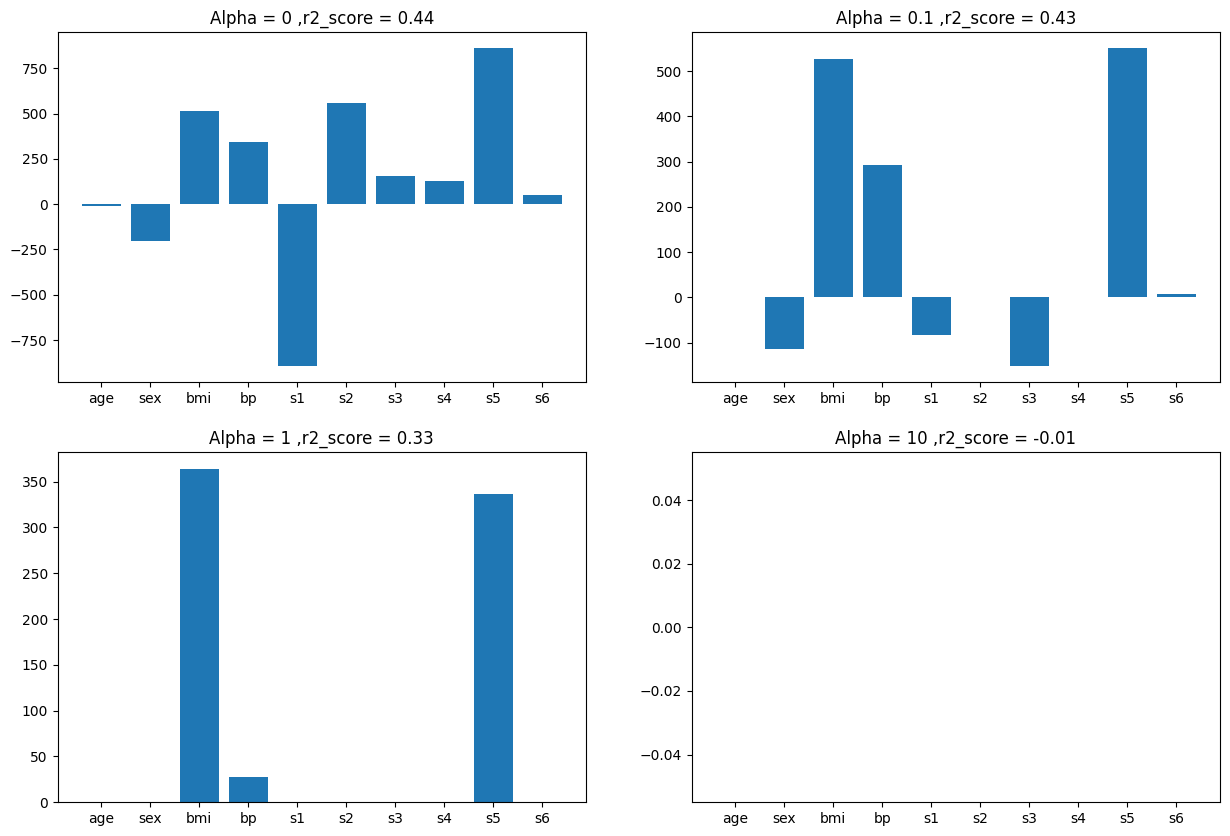

In [14]:
# Create a figure with multiple subplots to visualize the coefficients for different alpha values.
plt.figure(figsize=(15,10))

# Create the first subplot for alpha = 0 (equivalent to linear regression).
plt.subplot(221)

# Create a bar plot of the coefficients.
plt.bar(data.feature_names,coefs[0])

# Set the title of the subplot including the alpha value and R2 score.
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

# Create the second subplot for alpha = 10.

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

# Create the third subplot for alpha = 100.

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

# Create the fourth subplot for alpha = 1000.

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))
plt.show()

# **2.Higher Coefficients are affected more**

In [15]:
# Define a range of alpha values to explore.

alpha = [0,0.0001,0.001,0.01,0.1,1,10,100,1000]

# Initialize a list to store coefficients for each alpha

coefs = []

# Iterate through the alpha values.

for i in alpha:
  ridge = Lasso(alpha=i)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [16]:
# Convert the list of coefficients into a NumPy array.

input_array = np.array(coefs)

In [17]:
# Create a Pandas DataFrame from the coefficients, with feature names as columns.

coef_df = pd.DataFrame(input_array, columns=data.feature_names)

coef_df['alpha'] = alpha
coef_df.set_index('alpha')
# coef_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [18]:
# Define a refined range of alpha values for a more detailed plot.

alpha = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alpha:
  ridge = Lasso(alpha=i)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_.tolist())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

In [19]:
# Convert the list of coefficients to a NumPy array and transpose it.

input_array = np.array(coefs).T

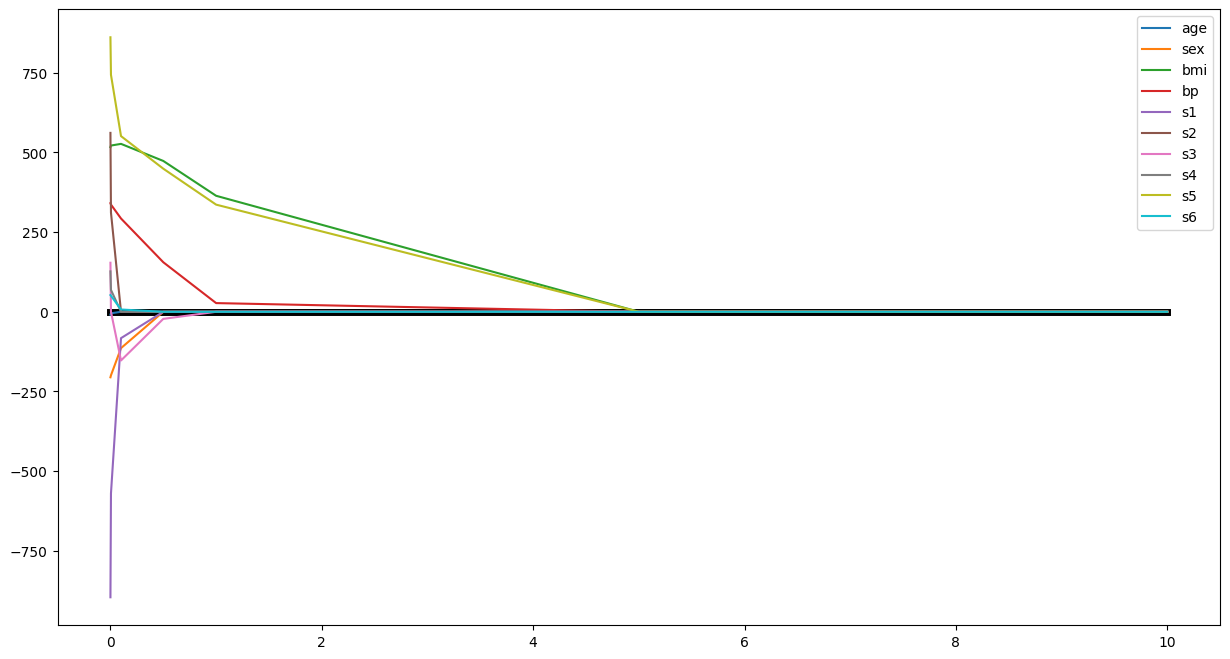

In [20]:
# Create a figure for plotting coefficient paths.

plt.figure(figsize=(15,8))

# Plot a horizontal line at y=0 for reference.

plt.plot(alpha, np.zeros(len(alpha)), color='black',linewidth=5)

# Iterate through each feature's coefficients.

for i in range(input_array.shape[0]):

   # Plot the coefficient values against alpha.

  plt.plot(alpha, input_array[i], label=data.feature_names[i])
  plt.legend()
plt.show()

# **3.Impact on Bias and Variance**

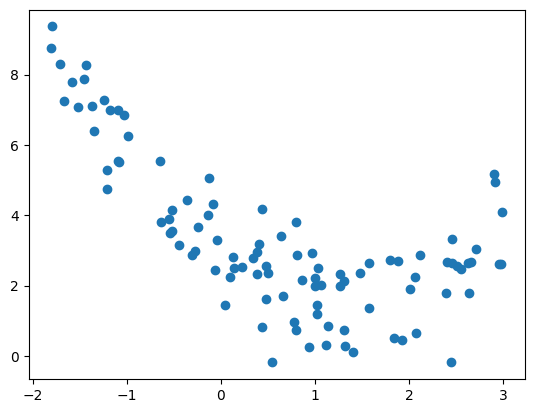

In [21]:
# Generate synthetic data with a non-linear relationship and added noise to demonstrate bias-variance tradeoff.

m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

In [22]:
# Split the synthetic data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1),y.reshape(100), test_size=0.2, random_state=2)


In [23]:
# Import PolynomialFeatures to create polynomial features.

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 10.

poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [24]:
# Import bias_variance_decomp to analyze bias, variance, and expected loss.

from mlxtend.evaluate import bias_variance_decomp

# Define a range of alpha values.

alpha = np.linspace(0,30,100)

# Initialize lists to store loss, bias, and variance.

loss = []
bias = []
variance = []


for i in alpha:
  # Create a Lasso model with the current alpha.
  reg = Lasso(alpha=i)

  # Decompose the mean squared error into bias, variance, and irreducible error.
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)

   # Append the calculated values to their respective lists.
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)

#


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+01, tolerance: 4.075e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+01, tolerance: 4.546e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

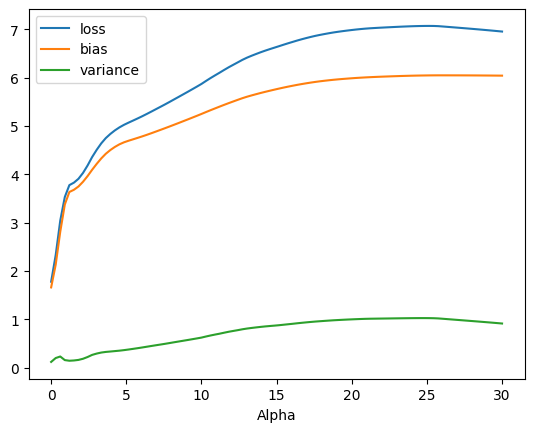

In [26]:
# Plot the loss, bias, and variance against alpha.

plt.plot(alpha, loss, label='loss')
plt.plot(alpha, bias, label='bias')
plt.plot(alpha, variance, label='variance')
# plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()
plt.show()

# **4.Effect of Regularization on loss Function**

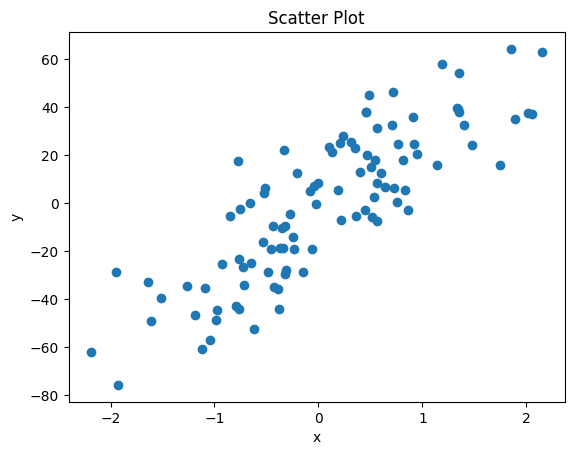

In [27]:
# Generate synthetic data for a simple linear regression example.

from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_informative=1,n_targets=1, n_features=1, noise=20,random_state=13)

plt.title('Scatter Plot')

# Create a scatter plot of the generated data.

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
# Import the LinearRegression model.

from sklearn.linear_model import LinearRegression

# Create a LinearRegression model.

reg = LinearRegression()

# Print the coefficient of the fitted model.

reg.fit(x,y)

print(reg.coef_)

print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [29]:
# Define a function to calculate the regularized loss for a given slope (m) and alpha.

def cal_loss(m,alpha):
  return np.sum((y - m*x.ravel() + 2.29)**2) + alpha*abs(m)

In [30]:
def predict(m):
  return m*x - 2.29

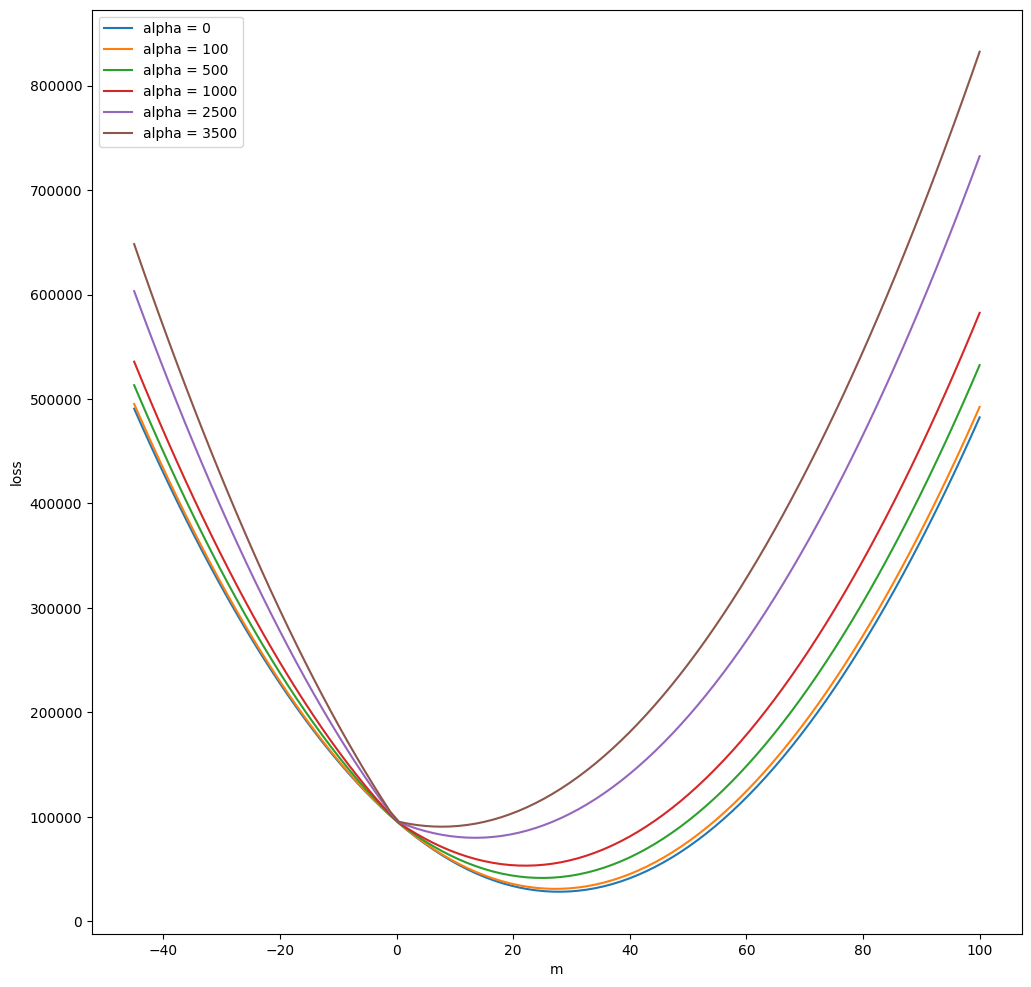

In [32]:
# Define a range of possible slope values (m).
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))

for j in [0,100,500,1000,2500,3500]:

  loss = []

  # Calculate the loss for each slope value in the range.
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)

    # Plot the loss function for the current alpha
  plt.plot(m,loss,label='alpha = {}'.format(j)) # alpha and lamda is same term
plt.legend()
plt.xlabel('m')
plt.ylabel('loss')
plt.show()